In [1]:
import torch
print(torch.__version__)
# sleep(1e4)

2.3.0.dev20240227


In [2]:
import numpy as np
# import datetime
import h5py
import pandas as pd
import random
# import torch.optim as optim
import torch.nn as nn
# import torch.functional as F
# from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.data import Dataset
# from torch.utils.tensorboard import SummaryWriter
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

In [4]:
device

device(type='mps')

In [5]:
def crop_centre(img, new_width, new_height):
    height, width, _ = img.shape
    startx = width//2 - new_width//2
    starty = height//2 - new_height//2    
    return img[  starty:starty + new_height, startx:startx + new_width, :]  

In [50]:
def add_watermark(im, texts, angle = 45):
  # image opening
  w, h = im.size
  font_size = w//8 if h > w else h//8 
  font_size = random.randint(font_size*0.5, font_size*1.5)
  wim = im.copy().rotate(-angle, expand=True).convert("RGBA") #watermark image
  fnt = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf", int(font_size/2))

  txt_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255), random.randint(50,200))

  txt = Image.new("RGBA", wim.size, (255, 255, 255, 0))
  d = ImageDraw.Draw(txt)
  text_w, text_h = random.randint(w*.25, w*.75), random.randint(h*.25, h*.75)
  for text in texts:
    d.text((text_w, text_h) , text, font=fnt, fill=txt_color)
    text_h += font_size//2
    text_w += random.randint(-font_size//4, font_size//4)
  out = Image.alpha_composite(wim, txt)
  out = out.rotate(angle, expand = True)
  wp, hp = out.size
  sw, sh = (wp-w)//2, (hp-h)//2
  out = out.crop(box = (sw, sh, w+sw, h+sh)).convert("RGB")
  # print(full_path)
  # out.save(output_image_path)
  return out


In [46]:
texts = ["Nihal Arju", "nihal.arju@intel.com"]

In [7]:
def tensor_from_npimage(img):
    return torch.tensor(img, device=device, dtype=torch.float32).\
    permute(2,0,1).view(1,3,128,128) / 255.0


In [8]:
# dataset class

class CoilDataset(Dataset):
    
    def __init__(self, file):
        self.file_object = h5py.File(file, 'r')
        self.dataset = self.file_object['coil-100']
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        if (index >= len(self.dataset)):
            raise IndexError()
        img = np.array(self.dataset[str(index)+'.png'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        pil_img = Image.fromarray(img)
        angle = random.randint(15,80)
        wtr_img = add_watermark(pil_img, texts=texts, angle=angle)
        wtr_img = np.array(wtr_img)
        return tensor_from_npimage(img), tensor_from_npimage(wtr_img)
    
    def plot_image(self, index):
        img = np.array(self.dataset[str(index)+'.png'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        plt.imshow(img, interpolation='nearest')
    
    def plot_watermarked(self, index):
        img = np.array(self.dataset[str(index)+'.png'])
        # crop to 128x128 square
        img = crop_centre(img, 128, 128)
        pil_img = Image.fromarray(img)
        angle = random.randint(15,80)
        wtr_img = add_watermark(pil_img, texts=texts, angle=angle)
        wtr_img = np.array(wtr_img)
        plt.imshow(wtr_img, interpolation='nearest')

    # def __getitem__(self, index):
    #     if (index >= len(self.dataset)):
    #       raise IndexError()
    #     img = np.array(self.dataset[str(index)+'.png'])
    #     return torch.tensor(img, device=device, dtype=torch.float32) / 255.0
    
    # def plot_image(self, index):
    #     plt.imshow(np.array(self.dataset[str(index)+'.png']), interpolation='nearest')

In [9]:
orih5 = r"/Users/narju/Documents/code/educative/retouch/coil-100-originals.h5py"
wtr5 = r"/Users/narju/Documents/code/educative/retouch/coil-100-watermarked.h5py"

In [10]:
f = h5py.File(orih5)

In [11]:
list(f.keys())

['coil-100']

In [12]:
with h5py.File(orih5,'r') as f_obj:
    print("datasets: ")
    for dset in f_obj:
        print(dset)
    print("keys: ")
    for group in f_obj.keys():
        print(group)

    dataset = f_obj['coil-100']

datasets: 
coil-100
keys: 
coil-100


def add_watermark(im, texts, angle = 45):
  # image opening
  w, h = im.size
  font_size = w//8 if h > w else h//8 
  font_size = random.randint(font_size*0.5, font_size*1.5)
  wim = im.copy().rotate(-angle, expand=True).convert("RGBA") #watermark image
  fnt = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf", int(font_size/2))

  txt_color = (random.randint(0,255), random.randint(0,255), random.randint(0,255), random.randint(50,200))

  txt = Image.new("RGBA", wim.size, (255, 255, 255, 0))
  d = ImageDraw.Draw(txt)
  text_w, text_h = random.randint(w*.25, w*.75), random.randint(h*.25, h*.75)
  for text in texts:
    d.text((text_w, text_h) , text, font=fnt, fill=txt_color)
    text_h += font_size//2
  out = Image.alpha_composite(wim, txt)
  out = out.rotate(angle, expand = True)
  wp, hp = out.size
  sw, sh = (wp-w)//2, (hp-h)//2
  out = out.crop(box = (sw, sh, w+sw, h+sh)).convert("RGB")
  # print(full_path)
  # out.save(output_image_path)
  return out

texts = ["Nihal Arju", "nihal.arju@intel.com"]

(128, 128, 3)
(128, 128, 3)


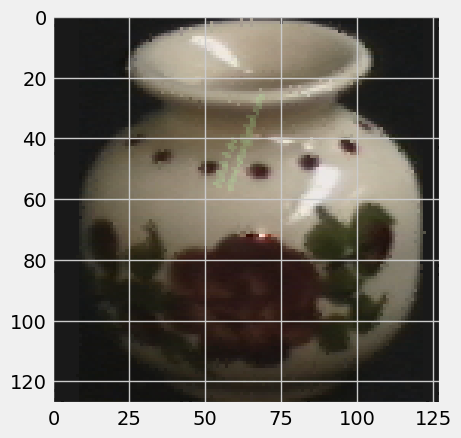

In [13]:
with h5py.File(orih5, 'r') as f_obj:
    dataset = f_obj['coil-100']
    # print("values: ", dataset[:])
    image = np.array(dataset['35.png'])
    print(image.shape)
    # plt.imshow(image, interpolation='none')

with h5py.File(orih5, 'r') as f_obj:
    dataset = f_obj['coil-100']
    # print("values: ", dataset[:])
    npimage = np.array(dataset['35.png'])
    pil_img = Image.fromarray(npimage)
    angle = random.randint(15,80)
    image = add_watermark(pil_img, texts=texts, angle=angle)
    npimage = np.array(image)
    print(npimage.shape)
    plt.imshow(npimage, interpolation='none')

In [14]:
coil_dataset = CoilDataset(orih5)
watermarked_dataset = CoilDataset(wtr5)

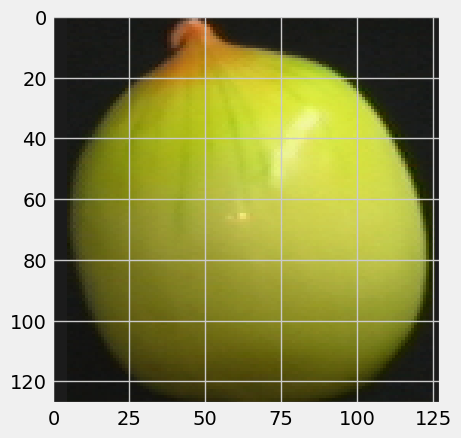

In [15]:
coil_dataset.plot_image(4105)

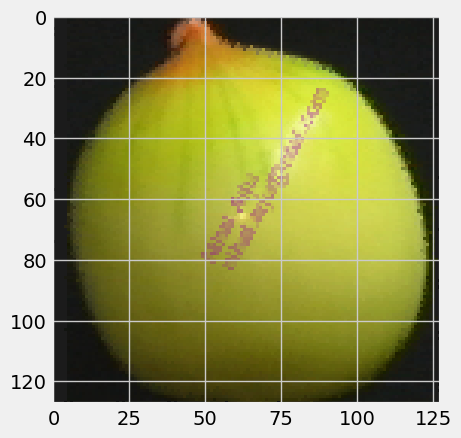

In [51]:
coil_dataset.plot_watermarked(4105)

In [17]:
# modified from https://github.com/pytorch/vision/issues/720

class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,

    def forward(self, x):
        return x.view(*self.shape)

In [18]:
# discriminator class
# this one uses fewer parameters but also initially smaller conv filter

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            # expect input of shape (1,3,128,128)
            nn.Conv2d(3, 64, kernel_size=3, stride=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(64, 3, kernel_size=8, stride=2),
            nn.BatchNorm2d(3),
            nn.LeakyReLU(0.2),
            
            # nn.Conv2d(256, 3, kernel_size=8, stride=2),
            # nn.LeakyReLU(0.2),
            
            View(3*60*60),
            nn.Dropout(0.5),
            nn.Linear(3*60*60, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.lr = 1e-4
        self.optimiser = torch.optim.Adam(self.parameters(), lr=self.lr)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 100 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

In [19]:
# D = Discriminator()
# D.to(device)
# print(D)

In [20]:
# %%time
# # test discriminator can separate real data from random noise
# # move model to cuda device

# for epoch in range(10):
#     cntr = 0
#     for image_data_tensor, wtr_data_tensor in coil_dataset:
#         # real data
#         D.train(image_data_tensor, torch.tensor([1.0], device=device, dtype=torch.float32))
#         D.train(wtr_data_tensor, torch.tensor([0.0], device=device, dtype=torch.float32))
#         cntr += 1
#         if cntr > 2e8:
#             break

        

# Generator Network 

In [21]:
# generator class

class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.block8 = nn.Sequential(
            # expect input of shape (1,3,128,128)
            nn.Conv2d(3, 32, kernel_size=8, stride=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.05),

            nn.ConvTranspose2d(32, 3, kernel_size=8, stride=1),
            nn.BatchNorm2d(3),
            nn.Tanh()
        )

        self.block4 = nn.Sequential(
            # expect input of shape (1,3,128,128)
            nn.Conv2d(3, 32, kernel_size=4, stride=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.05),

            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=1),
            nn.BatchNorm2d(3),
            nn.Tanh()
        )

        self.block2 = nn.Sequential(
            # expect input of shape (1,3,128,128)
            nn.Conv2d(3, 32, kernel_size=2, stride=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.05),

            nn.ConvTranspose2d(32, 3, kernel_size=2, stride=1),
            nn.BatchNorm2d(3),
            nn.Tanh()
        )

        self.lr = 1e-3
        
        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=self.lr)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []
        
        pass
    
    # def make_block()
    
    def forward(self, inputs):        
        # simply run model
        return self.block2(inputs) \
            + self.block4(inputs)\
            + self.block8(inputs) \
            + inputs
    
    
    def train(self, D, inputs, target_image, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets) + ((target_image - g_output)**2).mean()

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 100 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

In [22]:
# 

In [23]:
G = Generator()
G.to(device)

Generator(
  (block8): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(8, 8), stride=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block4): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block2): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3

In [24]:
image,_ = watermarked_dataset[4105]
# D.to(device)
output = G(image)
print(output.shape)

torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


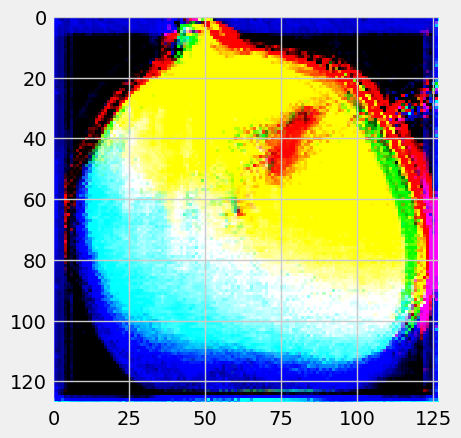

In [25]:
img = output.squeeze().permute(1,2,0).detach().cpu().numpy()
plt.imshow(img)

In [26]:
D = Discriminator()
D.to(device)

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Conv2d(64, 3, kernel_size=(8, 8), stride=(2, 2))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): View()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=10800, out_features=1, bias=True)
    (9): Sigmoid()
  )
  (loss_function): BCELoss()
)

In [27]:
G = Generator()
G.to(device)

Generator(
  (block8): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(8, 8), stride=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block4): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block2): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3

In [28]:
%%time 

D.lr = 1e-3
G.lr = 1e-3
for epoch in range(50):
    if epoch%5 ==0: print("epoch= ", epoch)
    if epoch > 30: 
      D.lr = 1e-4
      G.lr = 1e-4

    cntr = 0
    for image_data_tensor, wtr_data_tensor in coil_dataset:
      # train discriminator on true
      D.train(image_data_tensor, torch.tensor([1.0], device=device, dtype=torch.float32))
      D.train(wtr_data_tensor, torch.tensor([0.0], device=device, dtype=torch.float32))
      D.train(G(wtr_data_tensor).detach(), torch.tensor([0.0], device=device, dtype=torch.float32))
      # train generator
      G.train(D, wtr_data_tensor, image_data_tensor, torch.tensor([1.0], device=device, dtype=torch.float32))
      cntr += 1
      if cntr > 2e20:
        break


epoch=  0
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
epoch=  5
counter =  110000
counter =  120000
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
epoch=  10
counter =  220000
counter =  230000
counter =  240000
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
epoch=  15
counter =  330000
counter =  340000
counter =  350000
counter =  360000
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
epoch=  20
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000
co

KeyboardInterrupt: 

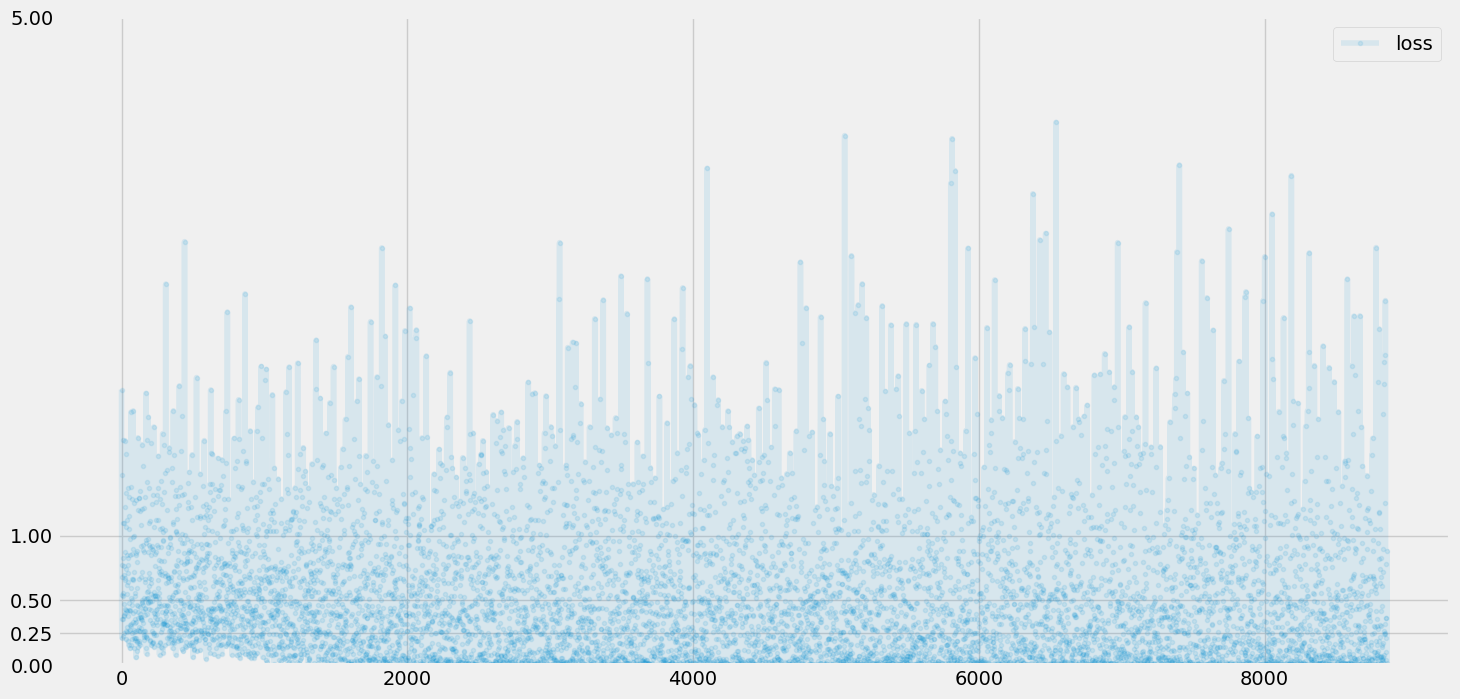

In [33]:
D.plot_progress()

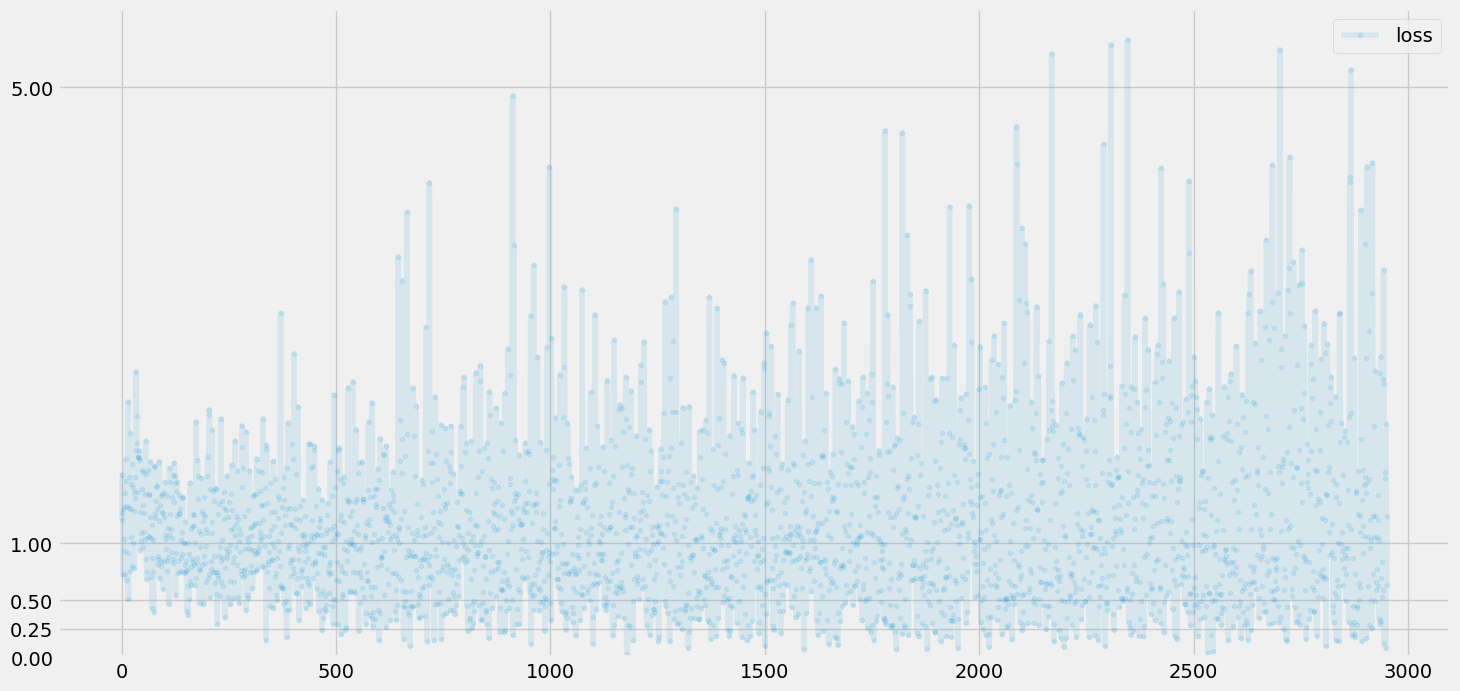

In [30]:
G.plot_progress()

In [31]:
n = 15 #4105
image, wimage = coil_dataset[n]
print(D(image))
# wimage = watermarked_dataset[n]
print(D(wimage))

tensor([0.4073], device='mps:0', grad_fn=<SigmoidBackward0>)
tensor([0.0065], device='mps:0', grad_fn=<SigmoidBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 128, 128])
tensor([0.2829], device='mps:0', grad_fn=<SigmoidBackward0>)
tensor([0.0354], device='mps:0', grad_fn=<SigmoidBackward0>)


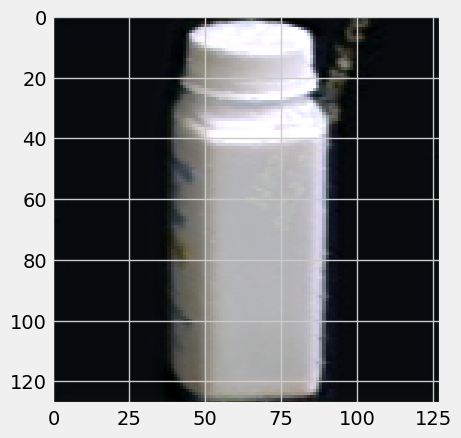

In [52]:
image, wimage = coil_dataset[1059]
# D.to(device)
output = G(wimage)
print(output.shape)
cleaned_img = output.squeeze().permute(1,2,0).detach().cpu().numpy()
plt.imshow(cleaned_img)
print(D(image))
print(D(output))

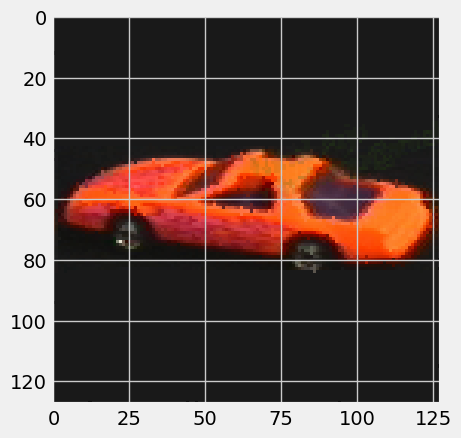

In [43]:
wimagen = wimage.squeeze().permute(1,2,0).detach().cpu().numpy()
plt.imshow(wimagen)

In [ ]:
G.progress

[0.9581530094146729,
 1.2545534372329712,
 0.5840864777565002,
 1.1628775596618652,
 1.138810634613037,
 1.2720459699630737,
 1.160609245300293,
 1.4286494255065918,
 1.0169904232025146,
 0.7497098445892334,
 0.8699299097061157,
 0.5792701840400696,
 1.14962637424469,
 1.0748167037963867,
 1.094301700592041,
 1.0587515830993652,
 1.2426879405975342,
 1.8963559865951538,
 2.147393226623535,
 0.8388369679450989,
 1.5972188711166382,
 1.3273630142211914,
 0.6369103789329529,
 1.9556293487548828,
 0.8888229727745056,
 1.2174804210662842,
 0.9834514856338501,
 1.3535486459732056,
 1.5221185684204102,
 1.2902119159698486,
 1.1077834367752075,
 1.0775775909423828,
 1.0825368165969849,
 0.9072411060333252,
 0.41690605878829956,
 1.104836106300354,
 0.9701116681098938,
 1.2751421928405762,
 1.938930869102478,
 1.8692277669906616,
 1.1068376302719116,
 0.7836997509002686,
 1.067620038986206,
 1.398750901222229,
 0.925736665725708,
 1.1538077592849731,
 1.5931346416473389,
 0.9331037998199463,
 1

In [ ]:
img[0][0]

array([-0.7917173, -0.6962798, -0.3736902], dtype=float32)

In [ ]:
img[127][127]

array([-0.7346514 ,  0.723832  , -0.65402997], dtype=float32)

In [ ]:
G.lr = 1e-4

In [ ]:
# G = Generator()
# G.to(device)

Generator(
  (block8): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(8, 8), stride=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block4): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(1, 1))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block2): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3

In [ ]:
G(image).shape

torch.Size([1, 3, 128, 128])

In [ ]:
G.progress

[]

In [ ]:
# generator class

# class Generator(nn.Module):

#     def __init__(self):
#         # initialise parent pytorch class
#         super().__init__()
        
#         # define neural network layers
#         self.block = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             nn.Conv2d(3, 32, kernel_size=2, stride=1),
#             nn.BatchNorm2d(32),
#             nn.LeakyReLU(0.05),

#             nn.ConvTranspose2d(32, 3, kernel_size=2, stride=1),
#             nn.BatchNorm2d(3),
#             nn.Tanh()
#         )

#         self.model = nn.Sequential(
#             self.block,
#             self.block
#         )

#         self.lr = 1e-2
        
#         # create optimiser, simple stochastic gradient descent
#         self.optimiser = torch.optim.Adam(self.model.parameters(), lr=self.lr)

#         # counter and accumulator for progress
#         self.counter = 0
#         self.progress = []
        
#         pass
    
    
#     def forward(self, inputs):        
#         # simply run model
#         return self.model(inputs) + inputs
    
    
#     def train(self, D, inputs, targets):
#         # calculate the output of the network
#         g_output = self.forward(inputs)
        
#         # pass onto Discriminator
#         d_output = D.forward(g_output)
        
#         # calculate error
#         loss = D.loss_function(d_output, targets) + ((inputs - g_output)**2).mean()

#         # increase counter and accumulate error every 10
#         self.counter += 1
#         if (self.counter % 100 == 0):
#             self.progress.append(loss.item())
#             pass

#         # zero gradients, perform a backward pass, update weights
#         self.optimiser.zero_grad()
#         loss.backward()
#         self.optimiser.step()

#         pass
    
    
#     def plot_progress(self):
#         df = pd.DataFrame(self.progress, columns=['loss'])
#         df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
#         pass
    
#     pass

In [ ]:
# # discriminator class

# class Discriminator(nn.Module):
    
#     def __init__(self):
#         # initialise parent pytorch class
#         super().__init__()
        
#         # define neural network layers
#         self.model = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             nn.Conv2d(3, 256, kernel_size=8, stride=2),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2),
            
#             nn.Conv2d(256, 256, kernel_size=8, stride=2),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2),
            
#             nn.Conv2d(256, 3, kernel_size=8, stride=2),
#             nn.LeakyReLU(0.2),
            
#             View(3*10*10),
#             nn.Linear(3*10*10, 1),
#             nn.Sigmoid()
#         )
        
#         # create loss function
#         self.loss_function = nn.BCELoss()

#         # create optimiser, simple stochastic gradient descent
#         self.optimiser = torch.optim.Adam(self.parameters(), lr=0.1e-4)

#         # counter and accumulator for progress
#         self.counter = 0;
#         self.progress = []

#         pass
    
    
#     def forward(self, inputs):
#         # simply run model
#         return self.model(inputs)
    
    
#     def train(self, inputs, targets):
#         # calculate the output of the network
#         outputs = self.forward(inputs)
        
#         # calculate loss
#         loss = self.loss_function(outputs, targets)

#         # increase counter and accumulate error every 10
#         self.counter += 1;
#         if (self.counter % 10 == 0):
#             self.progress.append(loss.item())
#             pass
#         if (self.counter % 1000 == 0):
#             print("counter = ", self.counter)
#             pass

#         # zero gradients, perform a backward pass, update weights
#         self.optimiser.zero_grad()
#         loss.backward()
#         self.optimiser.step()

#         pass
    
    
#     def plot_progress(self):
#         df = pd.DataFrame(self.progress, columns=['loss'])
#         df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
#         pass
    
#     pass

In [ ]:
# # generator class

# class Generator2(nn.Module):
    
#     def __init__(self):
#         # initialise parent pytorch class
#         super().__init__()
        
#         # define neural network layers
#         self.block8 = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             nn.Conv2d(3, 32, kernel_size=8, stride=1, padding=7),
#             nn.BatchNorm2d(32),
#             nn.LeakyReLU(0.05),

#             nn.ConvTranspose2d(32, 3, kernel_size=8, stride=1, padding=7),
#             nn.BatchNorm2d(3),
#             nn.Tanh(),
#         )

#         self.block4 = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             nn.Conv2d(3, 32, kernel_size=4, stride=1, padding=3),
#             nn.BatchNorm2d(32),
#             nn.LeakyReLU(0.05),

#             nn.ConvTranspose2d(32, 3, kernel_size=4, stride=1, padding=3),
#             nn.BatchNorm2d(3),
#             nn.Tanh(),
#         )

#         self.model = nn.Sequential(
#             # expect input of shape (1,3,128,128)
#             # encoder 2x2
#             nn.Conv2d(3, 12, kernel_size=2, stride=1, padding=1),
#             nn.BatchNorm2d(12),
#             nn.LeakyReLU(0.05),

#             # encoder 4x4
#             nn.Conv2d(12, 24, kernel_size=4, stride=1, padding=3),
#             nn.BatchNorm2d(24),
#             nn.LeakyReLU(0.05),

#             # encoder 8x8
#             nn.Conv2d(24, 36, kernel_size=8, stride=1, padding=7),
#             nn.BatchNorm2d(36),
#             nn.LeakyReLU(0.05),

#             # decoder 8x8
#             nn.ConvTranspose2d(36, 24, kernel_size=8, stride=1, padding=7),
#             nn.BatchNorm2d(24),
#             nn.LeakyReLU(0.05),

#             nn.ConvTranspose2d(24, 12, kernel_size=4, stride=1, padding=3),
#             nn.BatchNorm2d(12),
#             nn.LeakyReLU(0.05),

#             nn.ConvTranspose2d(12, 3, kernel_size=2, stride=1, padding=1),
#             nn.BatchNorm2d(3),
#             nn.Tanh()
#         )

#         self.lr = 1e-2
        
#         # create optimiser, simple stochastic gradient descent
#         self.optimiser = torch.optim.Adam(self.parameters(), lr=self.lr)

#         # counter and accumulator for progress
#         self.counter = 0
#         self.progress = []
        
#         pass
    
#     # def make_block()
    
#     def forward(self, inputs):        
#         # simply run model
#         return self.model(inputs) + inputs
    
    
#     def train(self, D, inputs, target_image, targets):
#         # calculate the output of the network
#         g_output = self.forward(inputs)
        
#         # pass onto Discriminator
#         d_output = D.forward(g_output)
        
#         # calculate error
#         loss = D.loss_function(d_output, targets) + ((target_image - g_output)**2).mean()

#         # increase counter and accumulate error every 10
#         self.counter += 1
#         if (self.counter % 100 == 0):
#             self.progress.append(loss.item())
#             pass

#         # zero gradients, perform a backward pass, update weights
#         self.optimiser.zero_grad()
#         loss.backward()
#         self.optimiser.step()

#         pass
    
    
#     def plot_progress(self):
#         df = pd.DataFrame(self.progress, columns=['loss'])
#         df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
#         pass
    
#     pass

In [ ]:
G2 = Generator2()
G2.to(device)

Generator2(
  (block8): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(1, 1), padding=(7, 7))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(8, 8), stride=(1, 1), padding=(7, 7))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (block4): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.05)
    (3): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
  )
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affin

In [ ]:
image, wimage = coil_dataset[7]
# D.to(device)
output = G2(wimage)
print(output.shape)
# cleaned_img = output.squeeze().permute(1,2,0).detach().cpu().numpy()
# plt.imshow(cleaned_img)
# print(D(image))
# print(D(output))

torch.Size([1, 3, 128, 128])


In [54]:
import os
os.getcwd()

'/Users/narju/Documents/code/educative/retouch/clean_watermark'

In [55]:
torch.save(G.state_dict(), "/Users/narju/Documents/code/educative/retouch/generator with convolutions in parallel.pt")

In [56]:
torch.save(D.state_dict(), "/Users/narju/Documents/code/educative/retouch/discriminator with 3x3 convolutions.pt")